In [60]:
from skimage.io import imshow
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<class 'numpy.ndarray'> (869, 684)


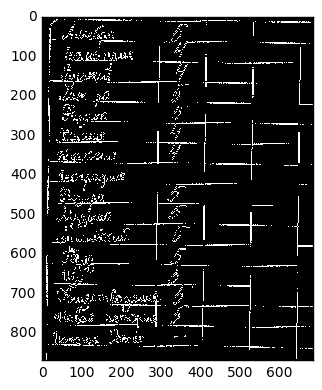

In [2]:
img = cv2.imread('./imgs/1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
# imshow(img)
print(type(img), img.shape)
img2 = np.copy(img)
img2 = cv2.Canny(img, 1000, 150)
# img2 = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
imshow(img2)

True

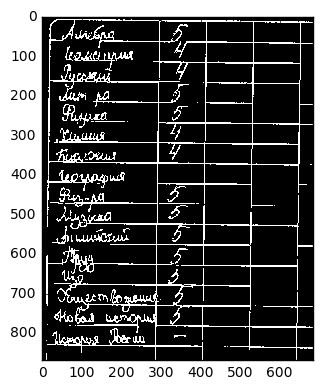

In [65]:
kernel = np.ones((3,3),np.uint8)

close_img = cv2.morphologyEx(img2, cv2.MORPH_CLOSE, kernel)
imshow(close_img)
cv2.imwrite('contours.png',close_img)

In [54]:
# ret, thresh = cv2.threshold(close_img,127,255,0)
# imshow(thresh)
# print(th)
test = np.copy(close_img)
im2, contours, hierarchy = cv2.findContours(test, cv2.RETR_TREE ,cv2.CHAIN_APPROX_SIMPLE)


# def selectCont(contour):

def to28x28(contour):
    cont = np.copy(contour)
    mins = np.min(cont, axis=0)
    cont -= np.full(shape=(len(cont),1, 2), fill_value=mins)
    shape = np.max(cont, axis=0)[0]
    
    dig = np.zeros((shape[1], shape[0]), np.uint8)

    cv2.drawContours(dig, [cont], -1, (255,139,0), 2)
    
    return dig

In [44]:
def scaling(pic):
    h, w = pic.shape
    addit = int(max(h,w) / 3)
#     print(h, w, addit, int((h - w)/2))
    if h > w:
        zeros = np.zeros((h, int((h - w)/2)), np.uint8)
        p2 = np.concatenate((zeros, pic, zeros), axis=1)
        w += int((h - w)/2) * 2
    else:
        zeros = np.zeros((int((w - h)/2), w), np.uint8)
        p2 = np.concatenate((zeros, pic, zeros), axis=0)
        h += int((w - h)/2) * 2

    zeros = np.zeros((h, addit), np.uint8)
    p2 = np.concatenate((zeros, p2, zeros), axis=1)
    zeros = np.zeros((addit, w + 2 * addit), np.uint8)
    p2 = np.concatenate((zeros, p2, zeros), axis=0)

    p2 = cv2.resize( p2,(28, 28), interpolation = cv2.INTER_CUBIC)
    
    return p2

/Users/ananas/anaconda/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image dynamic range; displaying image with stretched contrast.
  warn("Low image dynamic range; displaying image with "


True

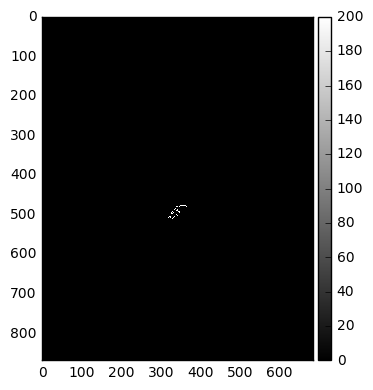

In [62]:
empty = np.zeros_like(test)
cv2.drawContours(empty, contours, 99, (200,200,200), 1)
imshow(empty, cmap='gray')
cv2.imwrite('selectedFive.png', empty)

In [56]:
from mnist.loader import MNIST
from operator import itemgetter

class Classificator:

    def __init__(self):
        loader = MNIST('./dataset')
        loader.load_training()
#         loader.load_test()
        self.train_images = np.array(loader.train_images)
        self.train_labels = np.array(loader.train_labels)
#         self.test_images = loader.test_images
#         self.test_labels = loader.test_labels
        self.train_N = 10000


    def classify(self, img, k=0.001):
        i_class = np.zeros(10)
        ind = 0
        N = self.train_N
        kNN = int(N * k)
        k_mass = []
        mass_class = np.zeros(10)
        for j in range(1, N):
            dist = np.sqrt(np.power(img - self.train_images[j], 2).sum())
            
            k_mass.append([dist, self.train_labels[j]])
            
            
        k_mass = sorted(k_mass, key=itemgetter(0))
        
            
        for k in range(kNN):
            i_class[k_mass[k][1]] += 1/k_mass[k][0]
            mass_class[k_mass[k][1]] += 1
                
                
        i_res = i_class.argmax()
#         print(mass_class)
        return i_res, (mass_class[i_res] / mass_class.sum())
        
    
    def test(self):
        right = 0
        N = 100
        for i in range(self.train_N, self.train_N + N):
            if self.classify(self.train_images[i])[0] == self.train_labels[i]:
                right += 1
                
        return right / N

In [32]:
np.zeros((2, 6))

array([[ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.]])

In [33]:
cl = Classificator()

(5, 0.80000000000000004)
80


True

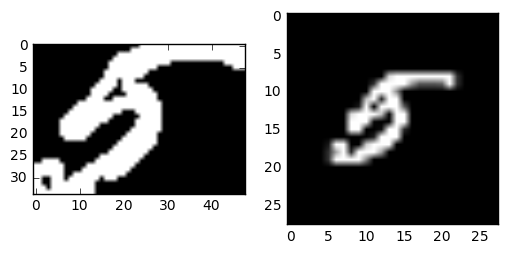

In [64]:
ind = 99
picture = to28x28(contours[ind])
resized_picture = scaling(picture).reshape((28*28))
print(cl.classify(resized_picture))
print(len(contours[ind]))
# imshow(picture)
# cl.test()
fig = fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2)
ax1.imshow(picture, cmap='gray')

# f2 = fig.add_subplot(212)
ax2.imshow(scaling(picture), cmap='gray')
cv2.imwrite('five1.png', picture)
cv2.imwrite('five2.png', scaling(picture))

/Users/ananas/anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


KeyboardInterrupt: 

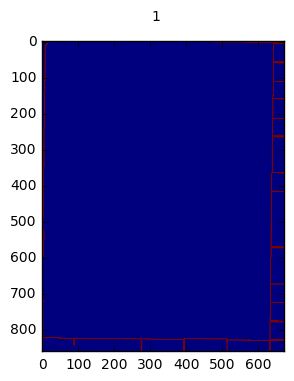

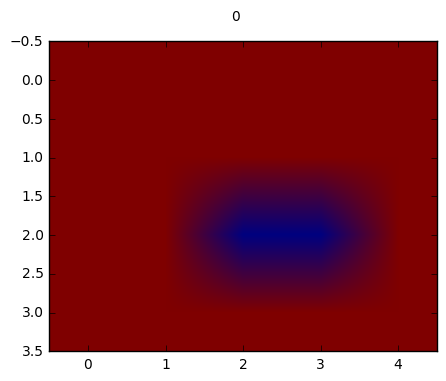

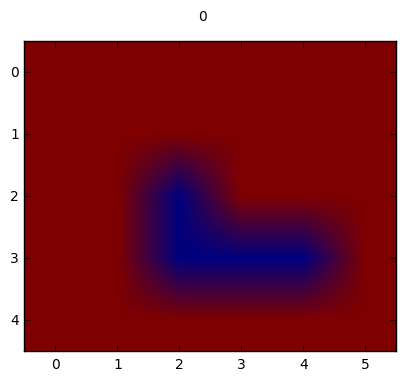

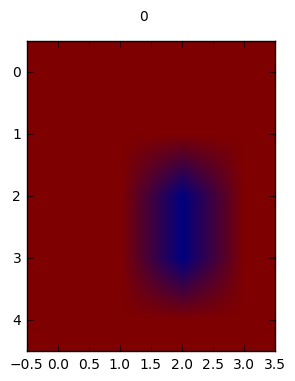

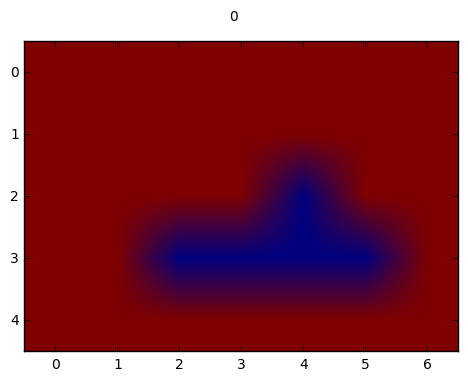

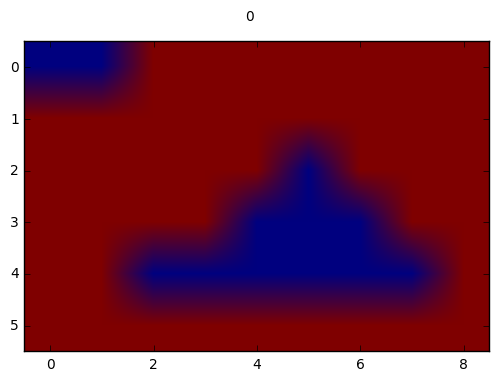

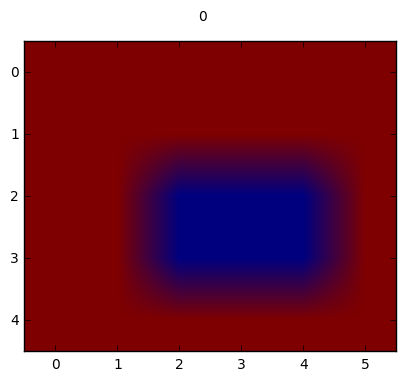

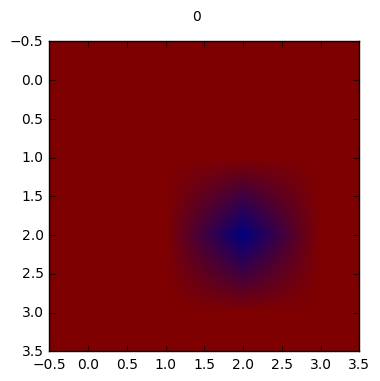

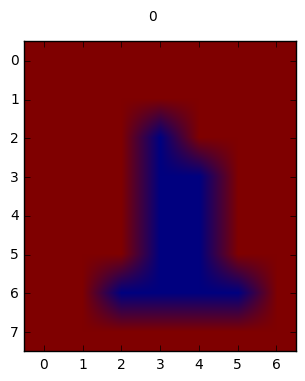

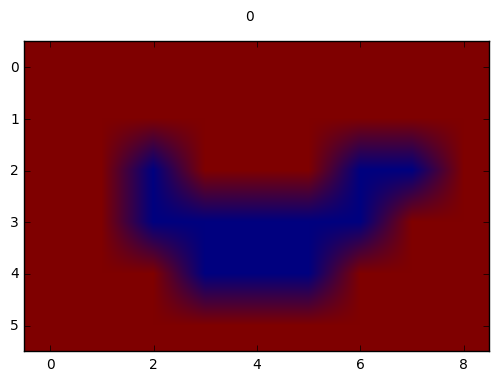

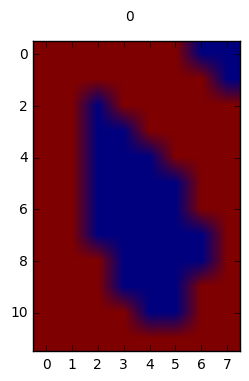

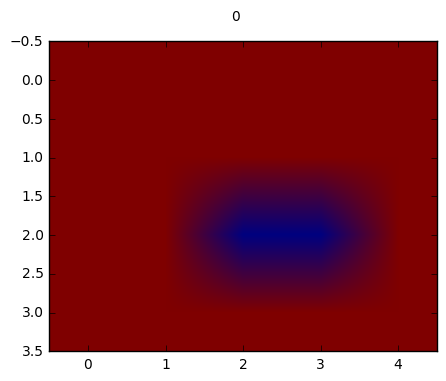

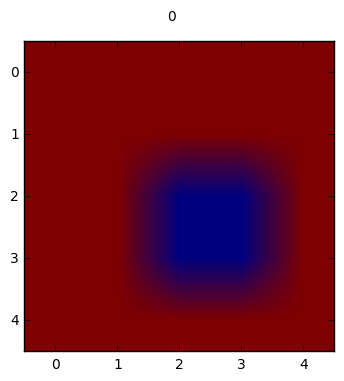

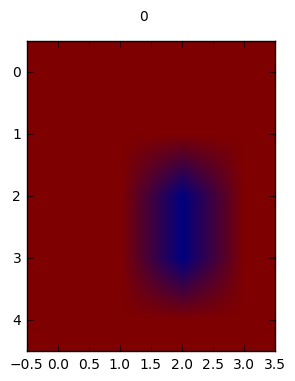

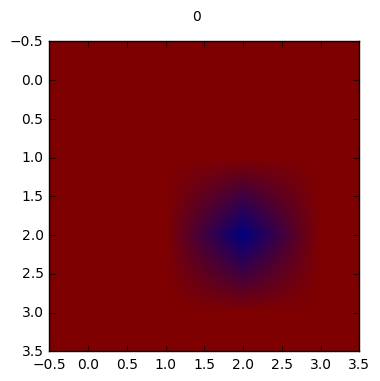

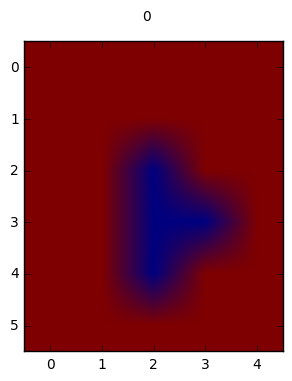

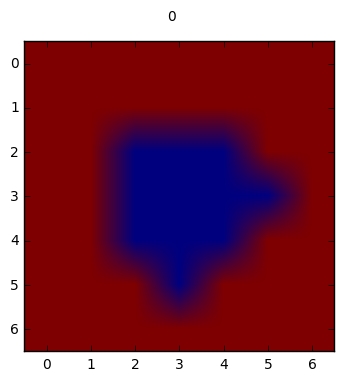

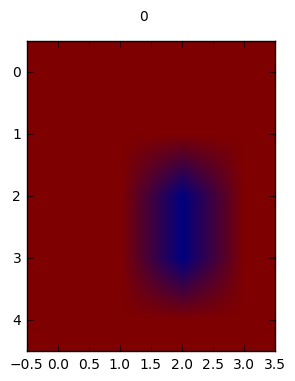

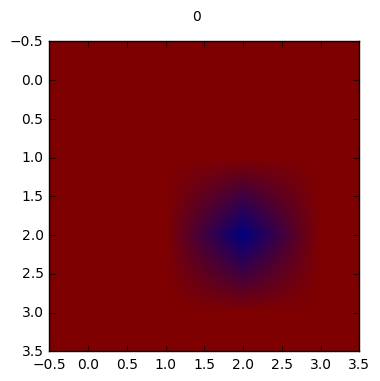

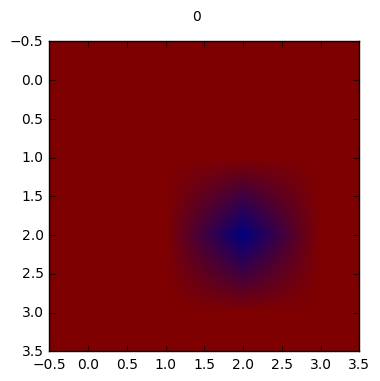

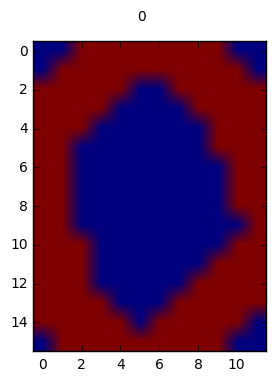

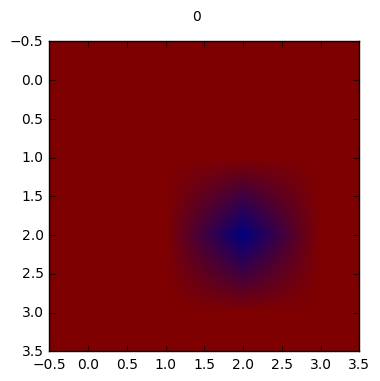

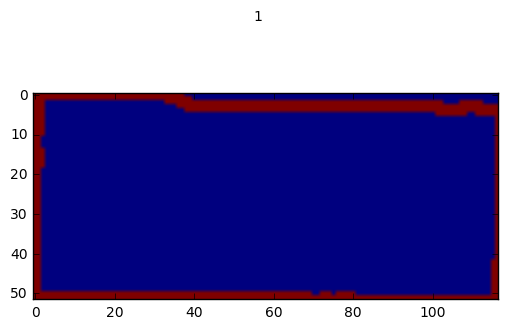

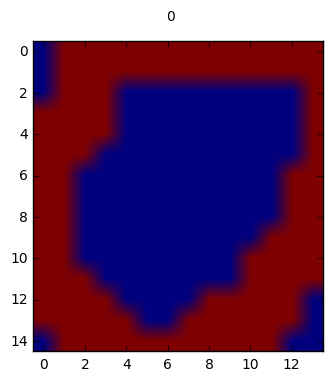

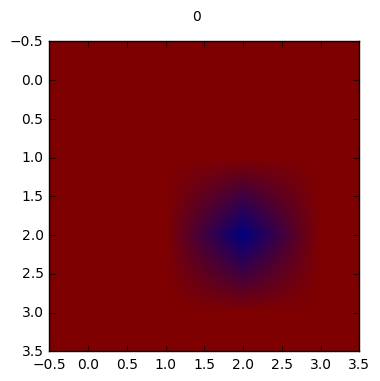

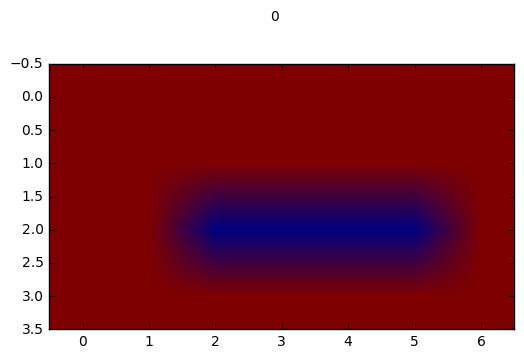

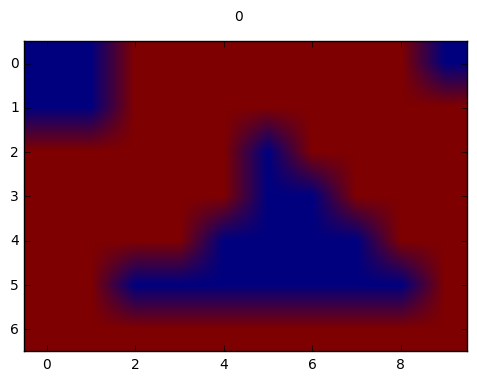

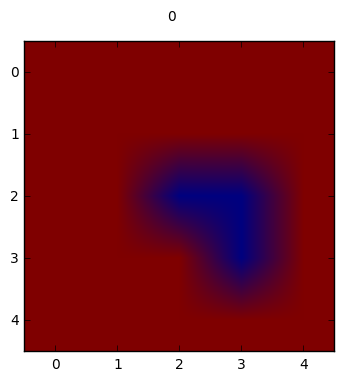

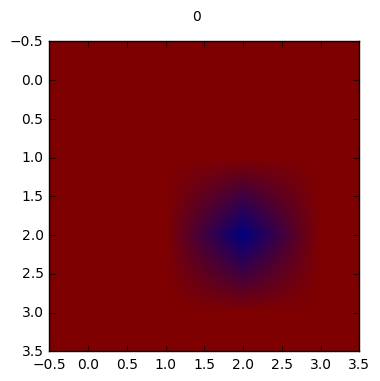

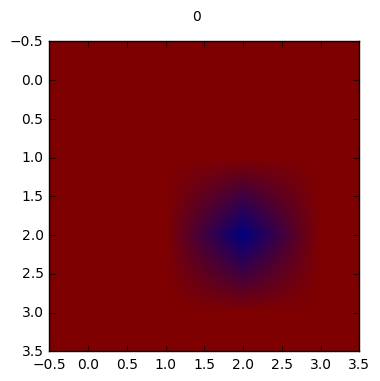

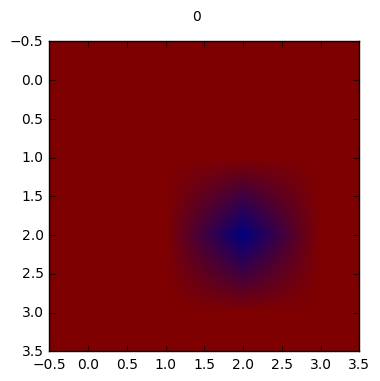

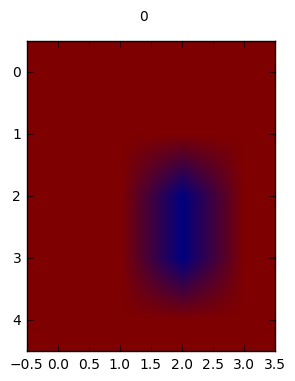

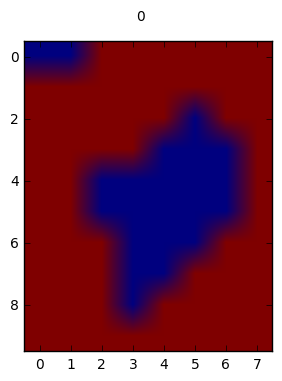

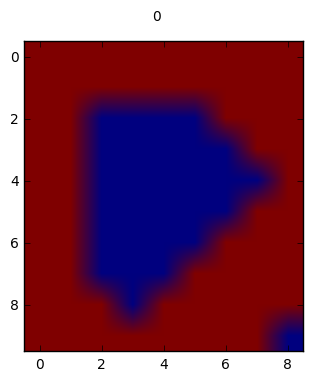

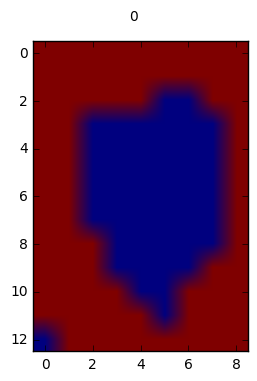

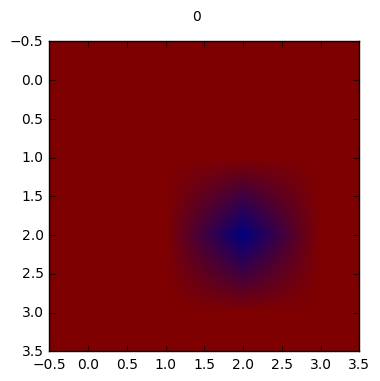

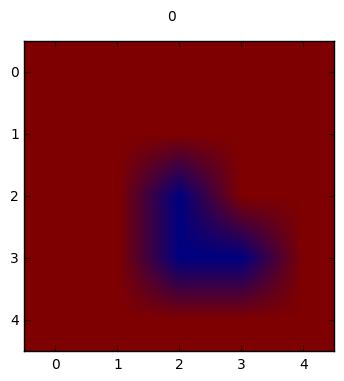

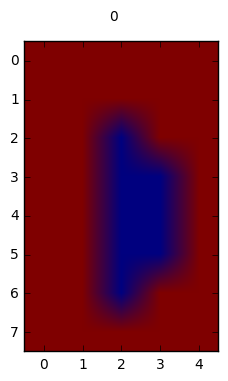

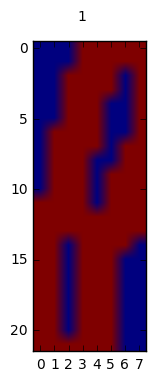

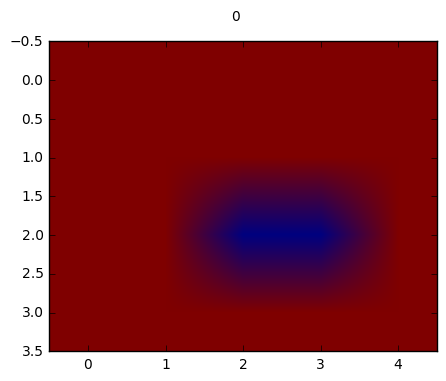

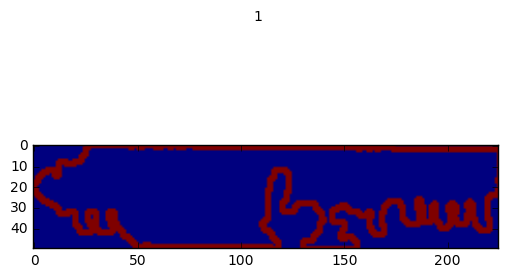

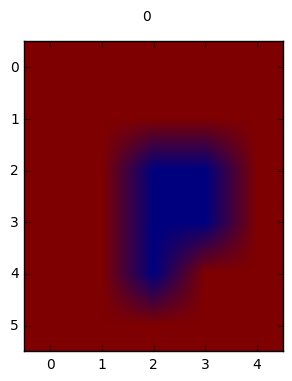

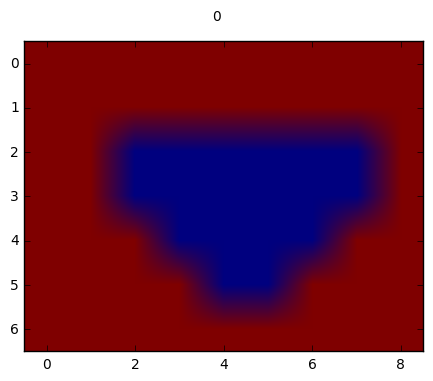

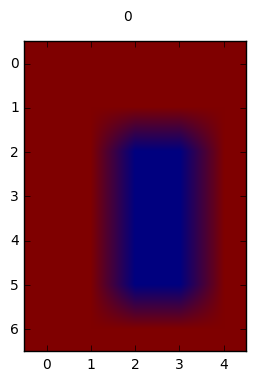

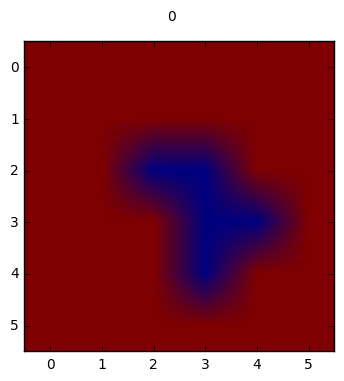

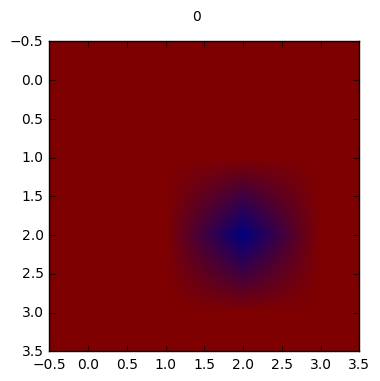

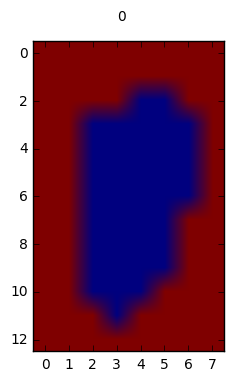

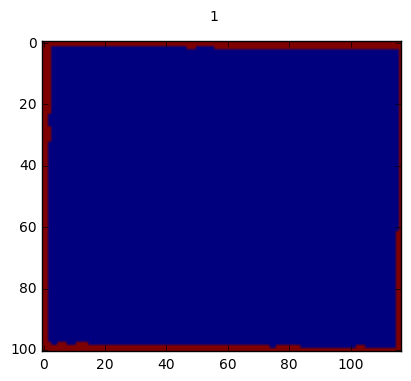

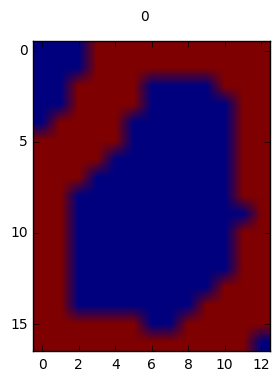

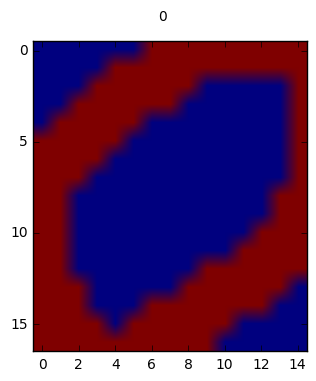

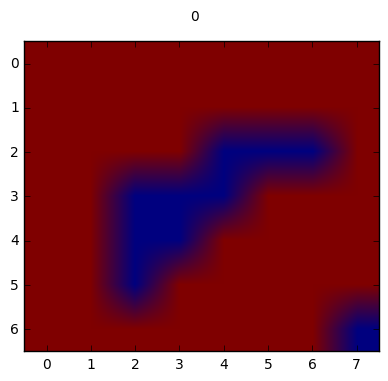

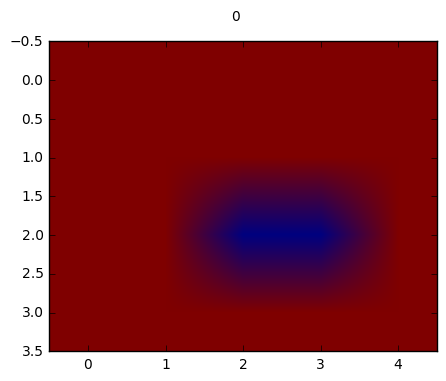

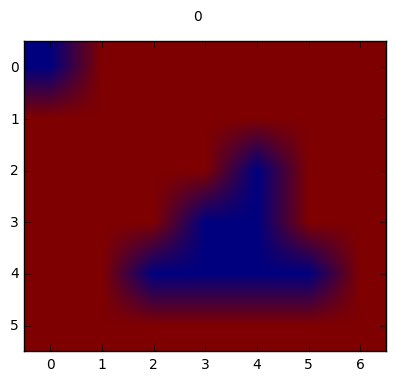

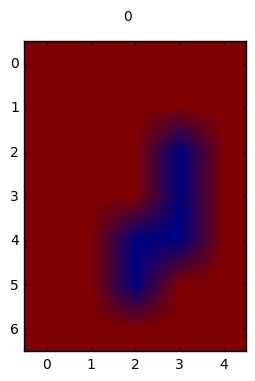

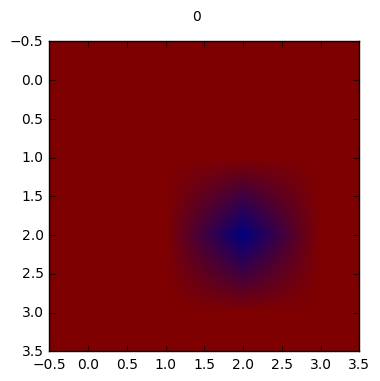

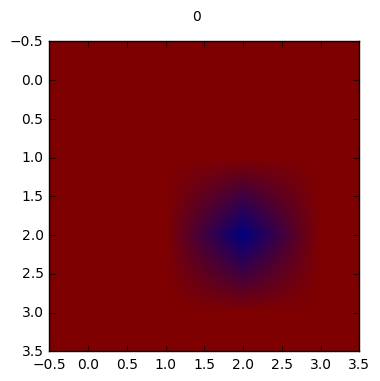

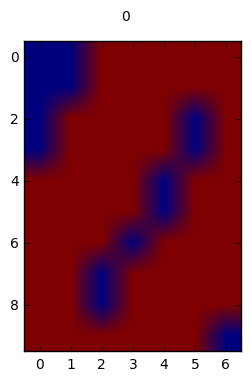

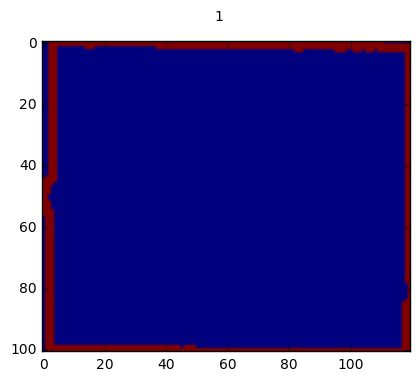

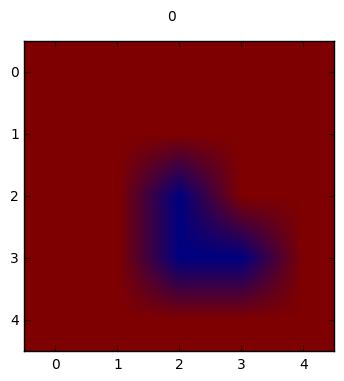

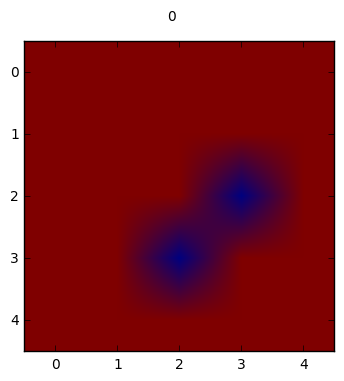

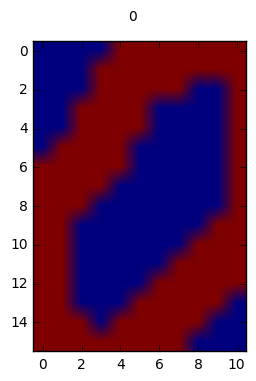

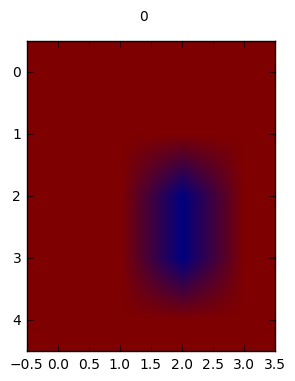

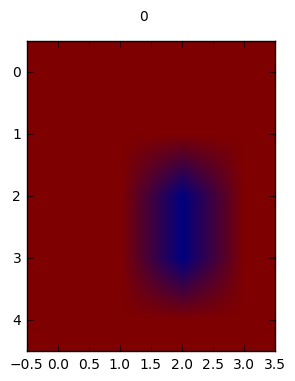

In [21]:
fig = plt.figure()
for i,cont in enumerate(contours):
    pic = to28x28(cont)
    resized_pic = scaling(pic).reshape((28*28))
    lbl, conf = cl.classify(resized_pic)
    if conf > 0.8:
#         print('lbl: ', lbl, 'ind: ', i)
        fig = plt.figure()
        fig.suptitle(lbl)
        plt.imshow(pic)